In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Classification

Ici plutôt que de prédire une fonction $f:\mathbb{R} \to \mathbb{R}$.
On va chercher à classer des entrées réelles en divers catégories (2 pour commencer).

Exemple: L'entrée est une image d'un chiffre, la sortie est le chiffre (0,1,...,9) on a 10 catégories.

Exemple: On a une photo contenant un champignon, la réponse est toxique/comestible.

On va prendre un exemple plus simple.

In [31]:
r, R = 5, 10
n = 40

thetas, Thetas = np.random.uniform(low=0., high=2 * np.pi, size=(2, n))
rs = np.random.normal(loc=r, scale=0.1, size=(n, ))
Rs = np.random.normal(loc=R, scale=0.1, size=(n, ))

vrais = rs * np.cos(thetas), rs * np.sin(thetas)
faux = Rs * np.cos(Thetas), Rs * np.sin(Thetas)

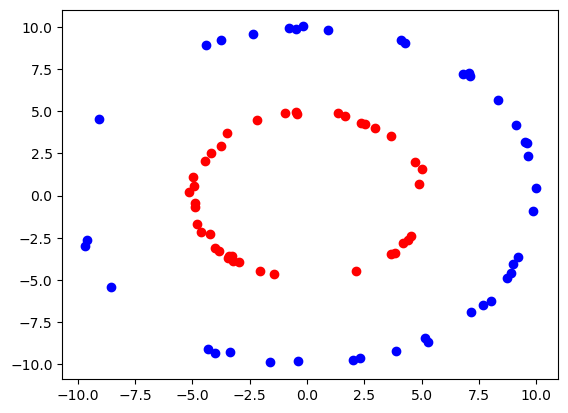

In [33]:
plt.scatter(*vrais, color="red")
plt.scatter(*faux, color="blue")

On a construit un modèle ou une règle serait:

- rayon < 7.5 -> vrai
- rayon > 7.5 -> faux

**EXERCICE** implémenter une régression logistique

L'idée est de voir un modèle avec trois paramètres réels $a,b,c$, tels que
$\sigma(a x^1 + b x^2 + c) \in [0,1]$ 
représente la probabilité d'être vrai.

Ici $\sigma$ est la sigmoide:
$$
\forall u \in \mathbb{R},\quad \sigma(u) = \frac{1}{1 + e^{-u}}.
$$


Ici les entrées sont des couples $((x^1_i,x^2_i))_{1\leq i \leq N}$ dans $\mathbb{R}^2$ et la sortie est $(y_i)_{1\leq i \leq N}$ suite de $0$ ou $1$.

In [35]:
X1 = np.stack(vrais).T
y1 = np.ones(shape=X1.shape[0])

In [36]:
X2 = np.stack(faux).T
y2 = np.ones(shape=X2.shape[0])

In [28]:
X = np.concatenate((X1, X2))
X.shape

(80, 2)

In [39]:
y = np.concatenate((y1, y2))
y.shape

(80,)

On va chercher à minimiser la fonctionnelle:
    
$$
J(a, b, c)= -\sum_{i=1}^N {
y_i \ln(\sigma(a x^1_i + b x^2_i + c))
+ (1-y_i) \ln(1 -\sigma(a x^1_i + b x^2_i + c))
}
$$

**EXERCICE** implémenter cette minimisation.

In [40]:
def sigma(z):
    return 1. / (1. + np.exp(-z))

In [41]:
def a_minimiser(coeffs):
    a, b, c = coeffs
    ps = sigma(a * X[:, 0] + b * X[:, 1] + c)
    return - np.sum( y * np.log(ps) + (1. - y) * np.log(1 - ps))

In [44]:
resultat = minimize(
    fun=a_minimiser,
    x0=np.zeros(shape=(3,)),
)


In [45]:
a, b, c = resultat.x

In [46]:
ps = sigma(a * X[:, 0] + b * X[:, 1] + c)

In [47]:
preds = np.where(ps > 0.5, 1., 0.)

In [48]:
preds == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

**EXERCICE** 
Visualiser les zones de décisions.